# Task 2:

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Dataset Description

The Titanic dataset is a classic dataset used in data science and machine learning, containing information about passengers aboard the RMS Titanic. The dataset includes features such as passenger survival status, ticket class (1st, 2nd, 3rd), gender, age, number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket number, fare, cabin number, and port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

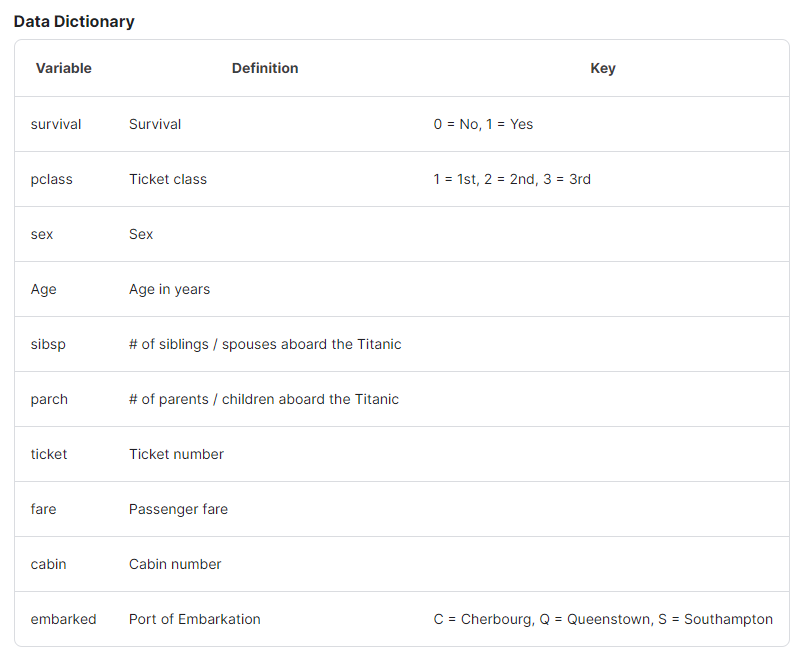

## 1. Import Libraries and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('titanic.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C


## 2. Data Cleaning

In [7]:
# check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# fill the missing Age with median age
data['Age'].fillna(data['Age'].median(), inplace=True)

In [10]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
# fill the missing Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [15]:
# Drop Cabin column (too many missing values)
data.drop(columns=['Cabin'], inplace=True)

In [16]:
# check for missing values after filled with median in Age and mode in Embarked
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

    Observation: No missing values found

In [19]:
# convert Sex to numerical values (male: 1, female: 0)
data['Sex'] = data['Sex'].map({'male':1, 'female':0}).astype(int)

In [21]:
# Ensure correct data types
data['Pclass'] = data['Pclass'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

## 3. Exploratory Data Analysis (EDA)

### 1. Visualization of Survival of People

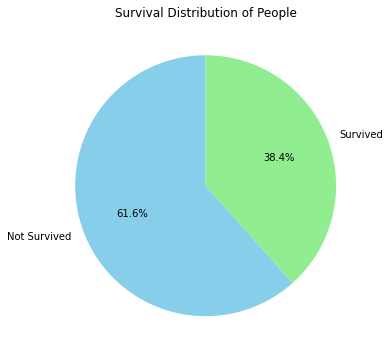

In [24]:
# Pie chart for survival of people
plt.figure(figsize=(8, 6))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], labels=['Not Survived', 'Survived'], startangle=90)
plt.title('Survival Distribution of People')
plt.ylabel('')
plt.show()


Inference:

The pie chart shows that a majority of the passengers did not survive the Titanic disaster, with approximately 62% not surviving and 38% surviving.

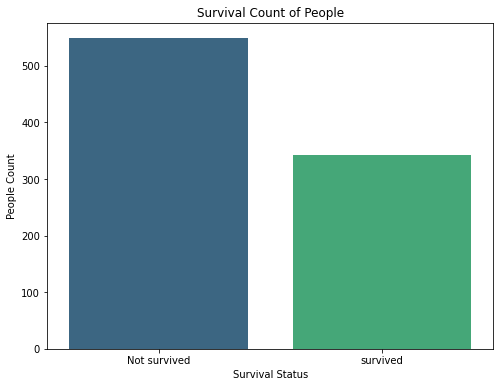

In [30]:
# Bar plot for survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Survival Count of People')
plt.xlabel('Survival Status')
plt.ylabel('People Count')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

Inference:

The bar plot confirms the pie chart's observation, highlighting that more passengers did not survive than those who did.

### 2. Visualization of People Survived from Different Genders

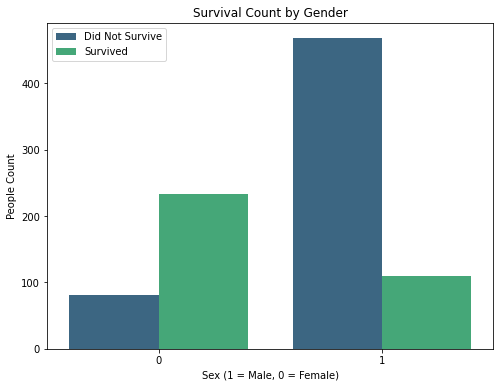

In [32]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('People Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


Inference:

The survival rate among females was significantly higher than males. More males did not survive, while a higher proportion of females survived the disaster.

Text(0, 0.5, '')

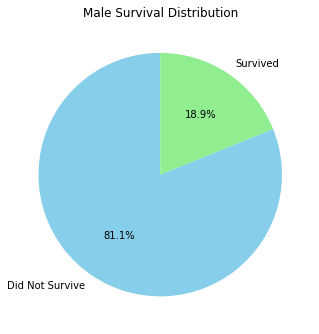

In [44]:
#pie chart representation of male survival and female survival

# Filter data by gender
male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Plot pie chart for male survival
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
male_data['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightgreen'], 
    labels=['Did Not Survive', 'Survived'], 
    startangle=90
)
plt.title('Male Survival Distribution')
plt.ylabel('')

Inference:

The pie chart for male survival shows that a significant majority of males did not survive the Titanic disaster.

Only a smaller proportion of males survived.

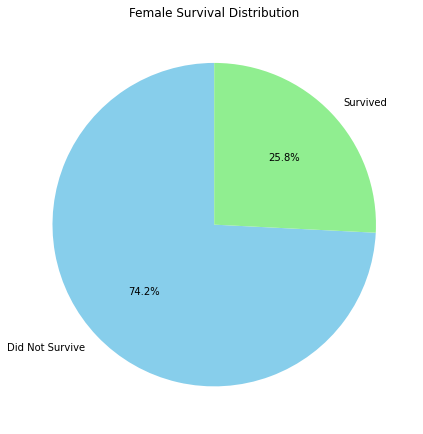

In [46]:
# Plot pie chart for female survival
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
female_data['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['skyblue', 'lightgreen'], 
    labels=['Did Not Survive', 'Survived'], 
    startangle=90
)
plt.title('Female Survival Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

Inference:

The pie chart for female survival shows that a larger proportion of females survived compared to male.

### 3. Visualization of People of Different Passenger Classes

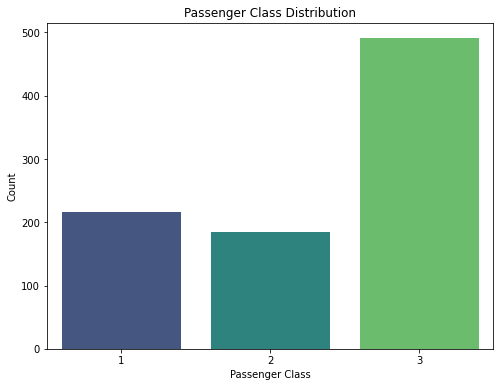

In [34]:
# Count of people by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='viridis')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Inference:

The majority of passengers were in the third class, followed by the first class and then the second class. This indicates a larger number of lower-class passengers on the Titanic.

### 4. Visualization of People Survived from Different Passenger Classes

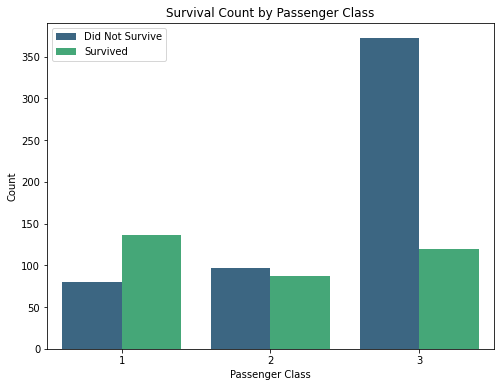

In [35]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

Inference:

Passengers in the first class had the highest survival rate, followed by the second class, while the third class had the lowest survival rate. This suggests a correlation between higher socioeconomic status and better chances of survival.

### 5. Visualization of People Survived from Different Embarkment Points

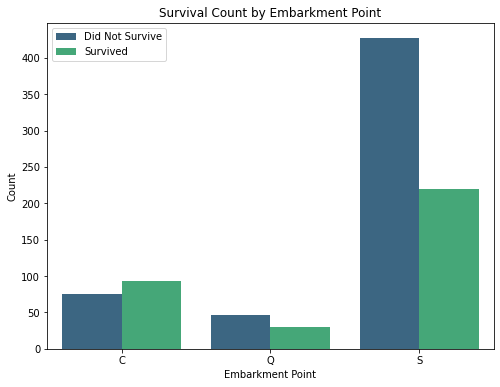

In [36]:
# Survival rate by embarkment
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Embarkment Point')
plt.xlabel('Embarkment Point')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()

Inference:

Passengers who embarked from Southampton (S) had a higher survival rate compared to those who embarked from Queenstown (Q) and Cherbourg (C). This may be influenced by the passenger classes and demographics associated with each embarkation point.

### 6. Visualization of People Survived by SibSp

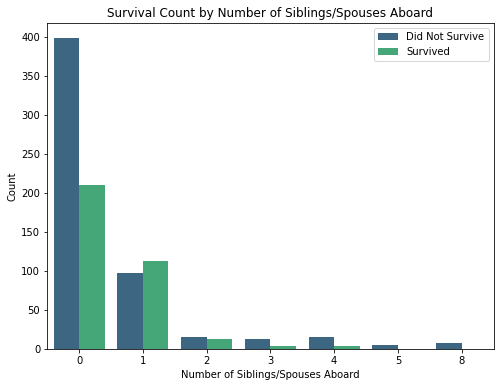

In [37]:
# Survival rate by number of siblings/spouses aboard
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


Inference:

Passengers with 1-2 siblings/spouses aboard had higher survival rates. Passengers with no siblings/spouses or many siblings/spouses aboard had lower survival rates, indicating that small family units had better chances of survival.

### 7. Visualization of Survival Rate in Different Age Categories

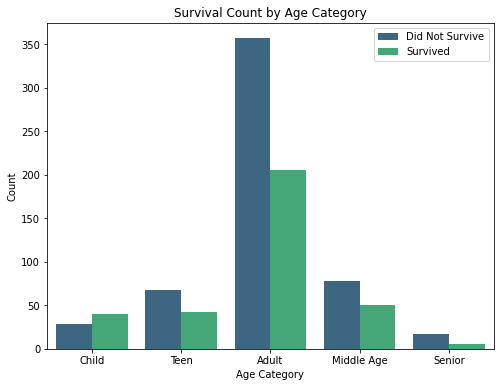

In [38]:
# Create age categories
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']
data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Survival rate by age category
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeCategory', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


Inference:

Adult had the highest survival rate among the age categories, while seniors had the lowest. This suggests prioritization of younger passengers during rescue operations.

### 8. Distribution of Fare and Age

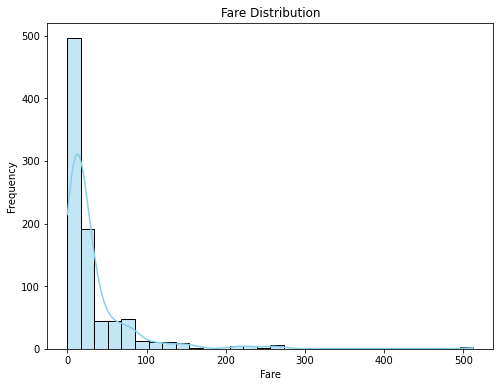

In [41]:
# Distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Inference:

The distribution of fares is right-skewed, with most passengers paying lower fares and a few paying very high fares. This is indicative of the fare structure and the distribution of passenger classes.
    

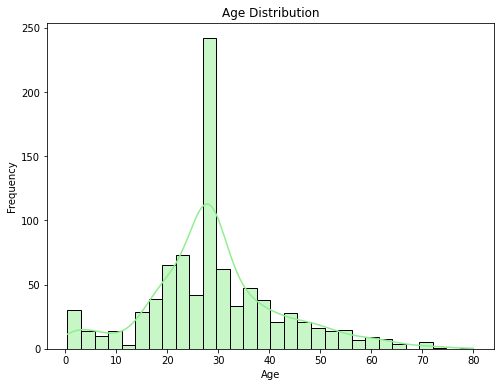

In [42]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Inference:

The age distribution shows a significant number of young adults, with fewer children and seniors. The majority of passengers were in the adult age range.

### 9. Checking for Correlation

C:\Users\CHANDU\AppData\Local\Temp/ipykernel_15532/3253068353.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


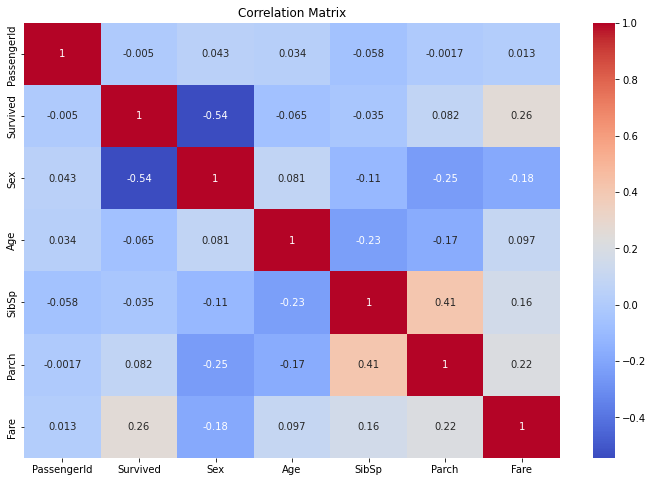

In [40]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Inference:

The heatmap of the correlation matrix shows that survival is positively correlated with being female and being in a higher passenger class (Pclass). There is also a slight positive correlation between fare and survival. This indicates that gender, passenger class, and fare are important factors affecting the likelihood of survival.